mengimport library dan path data nya

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4


mengimport menjadi dataframe, aku memilih nvda karena market cap terbesar saat ini di NYSE

In [141]:
import os
# Daftar nama file CSV yang ada di folder
csv_files = ['car details v4.csv']

# List untuk menyimpan DataFrame dari setiap file
dfs = []

# Loop untuk membaca setiap file CSV dan menambahkannya ke dalam list dfs
for file in csv_files:
    file_path = os.path.join(path, file)

    # Membaca file CSV
    df = pd.read_csv(file_path)

    # Menambahkan kolom 'symbol' untuk menandakan dari file mana data ini berasal
    df['symbol'] = file.split('.')[0]  # Nama file tanpa ekstensi (.csv)

    # Menentukan nama kolom volume sesuai dengan nama file (contoh: Volume_BTC)
    volume_col_name = f'Volume {df["symbol"].iloc[0]}'

    # Jika kolom volume ada, ganti namanya menjadi 'Volume'
    if volume_col_name in df.columns:
        df = df.rename(columns={volume_col_name: 'Volume'})

    # Menambahkan DataFrame ini ke dalam list
    dfs.append(df)

# Gabungkan semua DataFrame menjadi satu secara vertikal (ke bawah)
full_df = pd.concat(dfs, axis=0, ignore_index=True)
df = full_df

# Tampilkan 5 baris pertama untuk memastikan
df.head()



,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,symbol
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,car details v4
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,car details v4
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,car details v4
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,car details v4
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,car details v4


In [142]:
df.shape

(2059, 21)

mengcheck info, dan missing values dan duplikat

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [144]:
df[df.isna().any(axis=1)]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,symbol
6,Mercedes-Benz,CLA 200 Petrol Sport,1898999,2015,47000,Petrol,Automatic,Mumbai,White,Second,...,1991 cc,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,FWD,4630.0,1777.0,1432.0,5.0,NaN,car details v4
33,Honda,CR-V 2.4 AT,860000,2013,67000,Petrol,Automatic,Mumbai,Brown,First,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,car details v4
69,Audi,A4 2.0 TDI (143 bhp),1250000,2012,50000,Diesel,Automatic,Mumbai,White,First,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,car details v4
93,BMW,X5 xDrive30d Pure Experience (5 Seater),2950000,2015,84700,Diesel,Automatic,Navi Mumbai,Black,Second,...,2993 cc,258 bhp @ 4000 rpm,560 Nm @ 1500 rpm,AWD,4886.0,1938.0,1762.0,5.0,NaN,car details v4
94,Mercedes-Benz,GLC 220 d Sport,3900000,2018,83400,Diesel,Automatic,Hyderabad,White,Second,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,car details v4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,Honda,Accord 2.4 iVtec AT,195000,2008,57885,Petrol,Automatic,Delhi,Beige,First,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,car details v4
2032,Land Rover,Range Rover Velar 2.0 S Petrol 250,8900000,2020,88000,Petrol,Automatic,Mumbai,White,First,...,1997 cc,247 bhp @ 5500 rpm,365 Nm @ 1500 rpm,AWD,4797.0,2032.0,1665.0,5.0,NaN,car details v4
2035,Maruti Suzuki,Wagon R LXi,265000,2011,41000,Petrol,Manual,Pune,Brown,Second,...,998 cc,68@6200,90@3500,NaN,3539.0,1475.0,1700.0,5.0,35.0,car details v4
2052,Hyundai,i20 Sportz 1.4 CRDI,409999,2014,68000,Diesel,Manual,Agra,Silver,First,...,1396 cc,90@4000,220@1750,NaN,3940.0,1710.0,1505.0,5.0,45.0,car details v4


karena null valuesnya hanya 1, jadi ku drop saja

In [145]:
df.duplicated().sum()

0

In [146]:
df.dropna(inplace=True)

data sudah terisi semua null valuesnya, lanjut dengan analisis lanjutan seperti measures of central tendency dan measures of variability

measures of central tendency

In [147]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


Measures of Variability

In [148]:
range_result = df.select_dtypes(exclude='object').agg(lambda x: x.max() - x.min())

variance_result = df.select_dtypes(exclude='object').var()

std_deviation_result = df.select_dtypes(exclude='object').std()

iqr_result = df.select_dtypes(exclude='object').apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

print("Rentang per kelompok:")
print(range_result)
print("\nVarians per kelompok:")
print(variance_result)
print("\nSimpangan baku per kelompok:")
print(std_deviation_result)
print("\nInterquartile Range (IQR) per kelompok:")
print(iqr_result)

Rentang per kelompok:
Price                 34951000.0
Year                        34.0
Kilometer              2000000.0
Length                    2470.0
Width                      745.0
Height                     782.0
Seating Capacity             6.0
Fuel Tank Capacity          90.0
dtype: float64

Varians per kelompok:
Price                 5.885914e+12
Year                  9.850038e+00
Kilometer             3.456068e+09
Length                1.902885e+05
Width                 1.725148e+04
Height                1.812461e+04
Seating Capacity      6.512626e-01
Fuel Tank Capacity    2.300455e+02
dtype: float64

Simpangan baku per kelompok:
Price                 2.426090e+06
Year                  3.138477e+00
Kilometer             5.878833e+04
Length                4.362207e+02
Width                 1.313449e+02
Height                1.346277e+02
Seating Capacity      8.070084e-01
Fuel Tank Capacity    1.516725e+01
dtype: float64

Interquartile Range (IQR) per kelompok:
Price          

melihat unique di setiap kolom

In [149]:
df.nunique().sort_values(ascending=False)

,0
Model,955
Kilometer,790
Price,586
Max Power,309
Max Torque,264
Length,234
Height,189
Width,163
Engine,104
Location,75


diriku mendrop model karena sangat banyak sekali jenisnya jadi cukup menggunakan make saja

In [150]:
df.drop('Model', axis=1, inplace=True)

mendrop warna karena dengan asumsi kurang relevan dan bias

In [151]:
df.drop('Color', axis=1, inplace=True)

menghapus niali rpm di max power dan torque karena kurang berguna, disisakan hanya bhp dan nm

In [152]:
df['Max Power'] = df['Max Power'].str.extract(r'(\d+) bhp')
df['Max Power'] = df['Max Power'].astype(float)

In [153]:
df['Max Torque'] = df['Max Torque'].str.extract(r'(\d+)\sNm')[0].astype(str)
df['Max Torque'] = df['Max Torque'].astype(float)

menghapus cc di kolom engine

In [154]:
df['Engine'] = df['Engine'].str.extract(r'(\d+)\sCC')[0].astype(str)

melakukan rename pada merk mobil, jika dibawah 40 baris, maka akan masuk ke others

In [155]:
for i in df.Make.value_counts()[df.Make.value_counts() < 40].index :
  df.Make.replace(i,"Others",inplace=True)

<ipython-input-155-3e9823f36d80>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





melakukan rename pada lokasi menjadikan hanya 10 lokasi, sisanya akan masuk ke others

In [156]:
for i in df.Location.value_counts().sort_values(ascending=False)[10:].index :
  df.Location.replace(i,"Others",inplace=True)

<ipython-input-156-71f423b2b114>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





melakuakn rename pada fuel type lpg hybird cng+cng dan petrol+cng menjadi others karena frekuensi sangat rendah

In [157]:
for i in df['Fuel Type'].value_counts()[3:].index :
  df['Fuel Type'].replace(i,"Others",inplace=True)

<ipython-input-157-999c17a4e0d0>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





melakukan manipulasi pada tahun, aku menggunakan tanggal sekarang - tahun rilis agar lebih baik

In [158]:
current_year = datetime.now().year
df['Age'] = current_year - df['Year']

In [159]:
df.drop('Year', axis=1, inplace=True)

In [130]:
df['Seating Capacity'].unique()

array([5., 7., 4., 8., 2., 6.])

kolom engine dan symbol di drop saja karena tidak berpengaruh karena hanya 1 nunique nya


In [165]:
df.drop(['Engine','symbol'], axis=1, inplace=True)

klasifikasi price berdasarkan harga :

jika :

Murah: Price <= 500,000
Menengah: 500,001 <= Price <= 1,908,250
Mahal: Price > 1,908,250

In [174]:
# Tentukan batas-batas harga berdasarkan kuartil
bins = [0, 500000, 1908250, float('inf')]  # Murah, Menengah, Mahal
labels = ['Murah', 'Menengah', 'Mahal']

# Menggunakan pd.cut untuk mengklasifikasikan harga
df['Price Category'] = pd.cut(df['Price'], bins=bins, labels=labels)

In [177]:
df.drop('Price', axis=1, inplace=True)

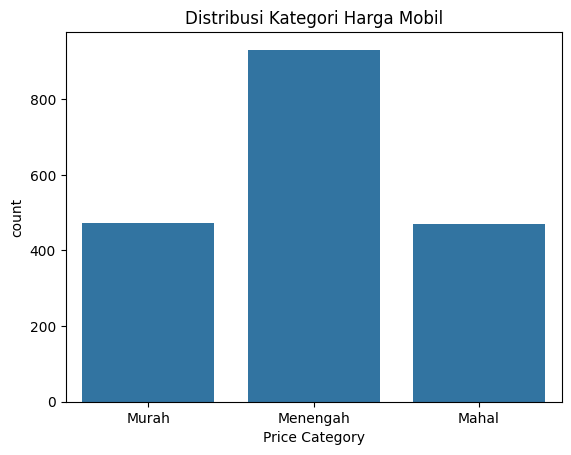

In [176]:
sns.countplot(data=df, x='Price Category')
plt.title('Distribusi Kategori Harga Mobil')
plt.show()

seating capacity diniatkan untuk di onehot encoding

In [190]:
df['Seating Capacity'] = df['Seating Capacity'].astype(str)

In [194]:
print(df.select_dtypes(exclude='object').info)
print(df.select_dtypes(include='object').info)

<bound method DataFrame.info of       Kilometer  Max Power  Max Torque  Length   Width  Height  \
0         87150       87.0       109.0  3990.0  1680.0  1505.0   
1         75000       74.0       190.0  3995.0  1695.0  1555.0   
2         67000       79.0      7619.0  3585.0  1595.0  1550.0   
3         37500       82.0       113.0  3995.0  1745.0  1510.0   
4         69000      148.0       343.0  4735.0  1830.0  1795.0   
...         ...        ...         ...     ...     ...     ...   
2053      79000       85.0       113.0  3775.0  1680.0  1620.0   
2054      90300      138.0       330.0  4585.0  1890.0  1785.0   
2055      83000       55.0        75.0  3495.0  1550.0  1500.0   
2056      73000       70.0       102.0  3795.0  1680.0  1427.0   
2057      60474      188.0       400.0  4936.0  1868.0  1479.0   

      Fuel Tank Capacity  Age Price Category  
0                   35.0    7       Menengah  
1                   42.0   10          Murah  
2                   35.0   13     

Machine Learning menggunakan Tree Based

In [197]:
df_copy = df.copy() #buat jaga-jaga agar tidak mengulang

In [199]:
df_encoded = pd.get_dummies(df, columns=(df.select_dtypes(include='object').columns), drop_first=True)

In [200]:
df_encoded.head()

,Kilometer,Max Power,Max Torque,Length,Width,Height,Fuel Tank Capacity,Age,Price Category,Make_BMW,...,Owner_UnRegistered Car,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD,Seating Capacity_4.0,Seating Capacity_5.0,Seating Capacity_6.0,Seating Capacity_7.0,Seating Capacity_8.0
0,87150,87.0,109.0,3990.0,1680.0,1505.0,35.0,7,Menengah,False,...,False,True,False,True,False,False,True,False,False,False
1,75000,74.0,190.0,3995.0,1695.0,1555.0,42.0,10,Murah,False,...,False,False,True,True,False,False,True,False,False,False
2,67000,79.0,7619.0,3585.0,1595.0,1550.0,35.0,13,Murah,False,...,False,False,True,True,False,False,True,False,False,False
3,37500,82.0,113.0,3995.0,1745.0,1510.0,37.0,5,Menengah,False,...,False,False,True,True,False,False,True,False,False,False
4,69000,148.0,343.0,4735.0,1830.0,1795.0,55.0,6,Mahal,False,...,False,False,True,False,True,False,False,False,True,False


import library untuk random tree

In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [202]:
X = df_encoded.drop(columns=['Price Category'])
y = df_encoded['Price Category']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Melatih model
rf.fit(X_train, y_train)

# Prediksi pada data test
y_pred = rf.predict(X_test)

# Evaluasi hasil
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8853


In [204]:
# Evaluasi hasil

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Recall, Precision, F1-Score untuk setiap kelas
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' menghitung rata-rata tertimbang
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')  # Rata-rata tertimbang

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report (menyediakan precision, recall, f1-score untuk tiap kelas)
cr = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

Accuracy: 0.8853
Recall: 0.8853
Precision: 0.8854
F1 Score: 0.8853

Confusion Matrix:
[[ 98   8   0]
 [  8 149  14]
 [  0  13  85]]

Classification Report:
              precision    recall  f1-score   support

       Mahal       0.92      0.92      0.92       106
    Menengah       0.88      0.87      0.87       171
       Murah       0.86      0.87      0.86        98

    accuracy                           0.89       375
   macro avg       0.89      0.89      0.89       375
weighted avg       0.89      0.89      0.89       375



In [205]:
import plotly.figure_factory as ff
import numpy as np

# Membuat confusion matrix (misal 'cm' adalah confusion matrix yang sudah dihitung)
cm = confusion_matrix(y_test, y_pred)

# Menentukan label untuk kelas (sesuaikan dengan label targetmu)
labels = y.unique()

# Membuat figure menggunakan Plotly
fig = ff.create_annotated_heatmap(
    z=cm,  # Data confusion matrix
    x=labels,  # Label untuk sumbu X (Predicted Labels)
    y=labels,  # Label untuk sumbu Y (True Labels)
    colorscale='Blues',  # Skema warna
    showscale=True,  # Menampilkan color scale
)

# Menambahkan judul dan label sumbu
fig.update_layout(
    title="Confusion Matrix",
    xaxis_title="Predicted Labels",
    yaxis_title="True Labels",
    xaxis=dict(tickmode='array', tickvals=np.arange(len(labels))),
    yaxis=dict(tickmode='array', tickvals=np.arange(len(labels)))
)

# Menampilkan figure
fig.show()